In [1]:
import pandas as pd
import math
import random
import time
import pylab as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
df = pd.DataFrame(columns=['x1','x2','t'])
df.loc[0] = [1,-1,-1]
df.loc[1] = [2,1,1]
df.loc[2] = [1.5,.5,-1]
df.loc[3] = [2,-1,-1]
df.loc[4] = [1,2,1]
df['bias'] = 1

In [126]:
class Perceptron:
    
    def __init__(self, w=[1,1,1]):
        self.w = w
    
    def activate(self,x1,x2,bias):
        if x1*self.w[0] + x2*self.w[1] + bias*self.w[2] > 0:
            return 1
        else:
            return -1
    
    def train_perceptron(self,df,n=0.1):
        self.w[0] = random.randint(-10,10)
        self.w[1] = random.randint(-10,10)
        while df.apply(lambda x: self.activate(x['x1'],x['x2'],x['bias'])!=x['t'],axis=1).sum() != 0:
            for i in range(df.shape[0]):
                xw = df.loc[i]['x1']*self.w[0] + df.loc[i]['x2']*self.w[1] + df.loc[i]['bias']*self.w[2]
                error = df.loc[i][2] - math.copysign(1,xw-0.0000000001)
                self.w[0] = self.w[0] + n*error*df.loc[i]['x1']
                self.w[1] = self.w[1] + n*error*df.loc[i]['x2']
                self.w[2] = self.w[2] + n*error*df.loc[i]['bias']
#            print self.w

In [72]:
p = Perceptron()

In [73]:
p.activate(1,2,3)

1

In [74]:
p.train_perceptron(df)

In [75]:
p.w

[-1.1000000000000005, 1.5000000000000036, 0.80000000000000004]

In [76]:
df.apply(lambda x: p.activate(x['x1'],x['x2'],x['bias'])==x['t'],axis=1)

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [77]:
df2 = pd.DataFrame(columns=['x1','x2','t','bias'])
for i in range(20):
    df2.loc[i] = [random.randint(-5,5),random.randint(-5,5),0,1]
df2['t'] = 2*((df2['x2'] - 1.2*df2['x1']) >= 0).astype(int) - 1

In [127]:
p2 = Perceptron()

In [128]:
p2.train_perceptron(df=df2)

In [130]:
#df2.apply(lambda x: p2.activate(x['x1'],x['x2'],x['bias'])==x['t'],axis=1)

In [132]:
for i in range(20):
    start = time.time()
    p2.train_perceptron(df=df2,n = float(i)/100 + 0.01)
    print time.time() - start

1.54468584061
0.593796014786
0.834845066071
0.181165933609
0.507241010666
0.170459985733
0.0906200408936
0.137035131454
0.143170118332
0.083377122879
0.0446979999542
0.0019838809967
0.00199508666992
0.0378758907318
0.0387871265411
0.0430469512939
0.00226283073425
0.104773044586
0.0588281154633
0.0507199764252


In [134]:
#When the learning rate is very small, it takes longer for the algorithm to converge

In [138]:
#x1 = -w[2] - x2*w[1] / w[0]

In [139]:
(-p2.w[2] - (-6)*p2.w[1]) / p2.w[0]

-7.3076923076923075

In [140]:
(-p2.w[2] - (6)*p2.w[1]) / p2.w[0]

7.4615384615384635

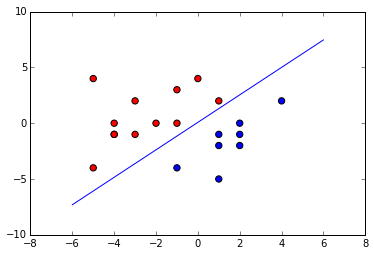

In [141]:
plt.scatter(df2['x1'],df2['x2'],c=df2.t.map({1:'r',-1:'b'}),s=40)
plt.plot([-6,6],[-7.3076923076923075,7.4615384615384635])

In [142]:
#2

In [184]:
class Perceptron:
    
    def __init__(self, w=[1,1,1]):
        self.w = w
    
    def activate(self,x1,x2,bias):
        if x1*self.w[0] + x2*self.w[1] + bias*self.w[2] > 0:
            return 1
        else:
            return -1
    
    def train_perceptron(self,df,n=0.1):
        self.w[0] = random.randint(-10,10)
        self.w[1] = random.randint(-10,10)
        while df.apply(lambda x: self.activate(x['x1'],x['x2'],x['bias'])!=x['t'],axis=1).sum() != 0:
            for i in range(df.shape[0]):
                xw = df.loc[i]['x1']*self.w[0] + df.loc[i]['x2']*self.w[1] + df.loc[i]['bias']*self.w[2]
                error = df.loc[i][2] - math.copysign(1,xw-0.0000000001)
                self.w[0] = self.w[0] + n*error*df.loc[i]['x1']
                self.w[1] = self.w[1] + n*error*df.loc[i]['x2']
                self.w[2] = self.w[2] + n*error*df.loc[i]['bias']
#            print self.w

    def batch_mode(self,df,n=0.1):
        self.w[0] = random.randint(-10,10)
        self.w[1] = random.randint(-10,10)
        while df.apply(lambda x: self.activate(x['x1'],x['x2'],x['bias'])!=x['t'],axis=1).sum() != 0:
            Xw = df2['x1']*w[0] + df2['x2']*w[1] + df2['bias']*w[2]
            self.w[0] += n*(df2['x1'] * (df2['t'] - Xw)).sum()
            self.w[1] += n*(df2['x2'] * (df2['t'] - Xw)).sum()
            self.w[2] += n*(df2['bias'] * (df2['t'] - Xw)).sum()
#            print w
            print (df2['x1'] * (df2['t'] - Xw)).sum()
#            self.w[0] = self.w[0] + 1
            print self.w

In [187]:
p3 = Perceptron()
p3.batch_mode(df=df2,n=0.1)

-203.2
[-27.319999999999983, -17.26, 179.19200000000055]
-203.2
[-47.639999999999965, -28.520000000000003, 185.21200000000056]
-203.2
[-67.95999999999995, -39.78, 191.23200000000057]
-203.2
[-88.27999999999993, -51.040000000000006, 197.25200000000058]
-203.2
[-108.59999999999991, -62.30000000000001, 203.2720000000006]
-203.2
[-128.9199999999999, -73.56000000000002, 209.2920000000006]
-203.2
[-149.2399999999999, -84.82000000000002, 215.3120000000006]
-203.2
[-169.5599999999999, -96.08000000000003, 221.33200000000062]
-203.2
[-189.87999999999988, -107.34000000000003, 227.35200000000063]
-203.2
[-210.19999999999987, -118.60000000000004, 233.37200000000064]
-203.2
[-230.51999999999987, -129.86000000000004, 239.39200000000065]
-203.2
[-250.83999999999986, -141.12000000000003, 245.41200000000066]
-203.2
[-271.15999999999985, -152.38000000000002, 251.43200000000067]
-203.2
[-291.47999999999985, -163.64000000000001, 257.4520000000007]
-203.2
[-311.79999999999984, -174.9, 263.47200000000066]
-2

KeyboardInterrupt: 